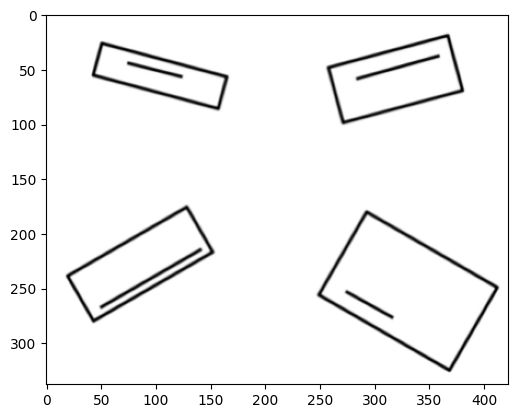

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('../rects.png')

plt.imshow(image)
plt.show()

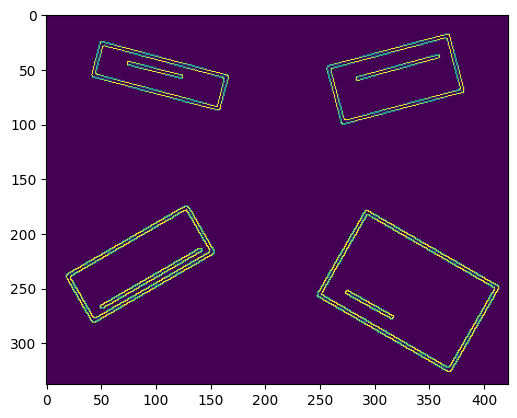

In [2]:
# Apply Canny edge detection.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)

plt.imshow(edges)
plt.show()

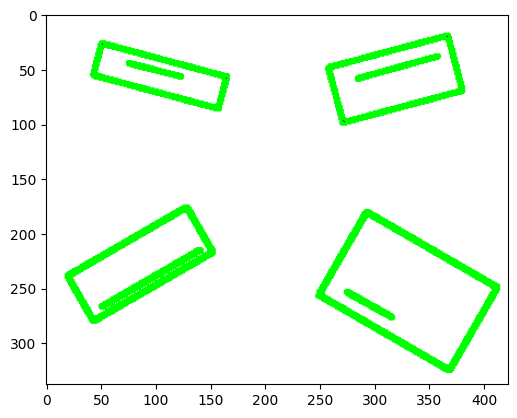

In [3]:
# Find contours in the edge-detected image with hierarchical retrieval
contours, hierarchy = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw the contours on
contour_image = image.copy()

cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
# Lists to store the lengths of contours
inner_contour_lengths = []

# Loop through the contours and hierarchy
for i, contour in enumerate(contours):
    # Get the parent index from the hierarchy
    parent_idx = hierarchy[0][i][3]
    
    if parent_idx != -1:
        # Inner contour, line
        perimeter = cv2.arcLength(contour, True)
        inner_contour_lengths.append((perimeter, i))  # Store length and index

# Sort the inner contour lengths in ascending order
inner_contour_lengths.sort()

inner_contour_lengths

[(109.53910398483276, 1),
 (113.5979790687561, 13),
 (171.63960921764374, 15),
 (230.73506212234497, 3),
 (300.8944424390793, 17),
 (325.9655101299286, 19),
 (336.20815074443817, 21),
 (352.7594470977783, 9),
 (361.2792183160782, 23),
 (377.73000931739807, 11),
 (466.2985512018204, 5),
 (490.440686583519, 7)]

In [5]:
# Assign numbers to the lines based on their lengths
line_numbers = {length_index[1]: i + 1 for i, length_index in enumerate(inner_contour_lengths)}
line_numbers

{1: 1,
 13: 2,
 15: 3,
 3: 4,
 17: 5,
 19: 6,
 21: 7,
 9: 8,
 23: 9,
 11: 10,
 5: 11,
 7: 12}

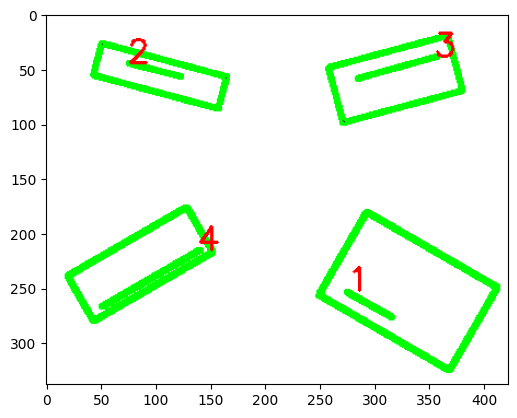

In [6]:
# Draw and label the lines for the four contours with lowest lengths
for length, index in inner_contour_lengths[:4]:  # Only the first four contours
    contour = contours[index]
    cv2.drawContours(contour_image, [contour], -1, (0, 255, 0), 2)  # Green color
    number = line_numbers[index]
    cv2.putText(contour_image, str(number), tuple(contour[0][0]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)  # Red color

plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.show()